In [7]:
import sqlite3
conn = sqlite3.connect('cocktail.sqlite3')
cursor = conn.cursor()
import matplotlib.pyplot as plt

In [20]:
#მომხმარებელს შემოჰყავს სასმლის დასახელება
beverage = input("შეიყვანეთ რომელი სასმლის რეცეპტი გსურთ(თუ ინგრედიენტების მიხედვით გინდათ არჩევა შემოიყვანეთ სიტყვა ingredient):")

შეიყვანეთ რომელი სასმლის რეცეპტი გსურთ(თუ ინგრედიენტების მიხედვით გინდათ არჩევა შემოიყვანეთ სიტყვა ingredient): ingredient


In [22]:
 # ინგრედიენტით ძებნა
if beverage == 'ingredient':
    # მომხმარებელს შეჰყავს ინგრედიენტები ერთი ხაზით
    ingredient_input = input("შეიყვანეთ ინგრედიენტები მძიმით გამოტოვებით(მაგ: gin, absent, water): ")

    # ინგრედიენტების list-ად წარმოდგენა
    ingredients_list = []
    for i in ingredient_input.split(','):
        i = i.strip()
        ingredients_list.append(i)

    # რეცეფტის ძებნა ინგრედიენტებით
    where_clause = " AND ".join([f"field9 LIKE \"%'{i}'%\"" for i in ingredients_list])
    cursor.execute(f"SELECT * FROM cocktail_reciepes WHERE {where_clause}")
    results = cursor.fetchall()
    for row in results:
        print(f'\n კოქტეილი: {row[2]}   ინგრედიენტები: {row[8]} {row[9]}   ინსტრუქცია: {row[6]} ')

else:
    #სახელით ძებნა კოქტეილის
    cursor.execute("SELECT * FROM cocktail_reciepes WHERE field3 = ?", (beverage,))
    final_results = cursor.fetchall()
    for row in final_results:
        print(f'კოქტეილი: {row[2]}   ინგრედიენტები: {row[8]} {row[9]}   ინსტრუქცია: {row[6]}')


შეიყვანეთ ინგრედიენტები მძიმით გამოტოვებით(მაგ: gin, absent, water):  gin, water



 კოქტეილი: Gin Toddy   ინგრედიენტები: ['Gin', 'Water', 'Powdered sugar', 'Lemon peel'] ['2 oz ', '2 tsp ', '1/2 tsp ', '1 twist of ']   ინსტრუქცია: Mix powdered sugar and water in an old-fashioned glass. Add gin and one ice cube. Stir, add the twist of lemon peel, and serve. 

 კოქტეილი: Gin Sling   ინგრედიენტები: ['Gin', 'Lemon', 'Powdered sugar', 'Water', 'Orange peel'] ['2 oz ', 'Juice of 1/2 ', '1 tsp ', '1 tsp ', 'Twist of ']   ინსტრუქცია: Dissolve powdered sugar in mixture of water and juice of lemon. Add gin. Pour into an old-fashioned glass over ice cubes and stir. Add the twist of orange peel and serve. 


In [25]:
# რეცეფტის დამატება
addition = input('გსურთ რეცეპტის ჩამატება ბაზაში? (დიახ/არა):')
if addition == 'დიახ':
    new_name = input('შეიყვანეთ დასახელება:')
    new_ingredient = input('შეიყვანეთ ინგრედიენტები')
    new_measurements = input('შეიყვანეთ ინგრედიენტების რაოდენობები')
    new_instruction = input('შეიყვანეთ მომზადების ინსტრუქცია')

cursor.execute(
        "INSERT INTO cocktail_reciepes (field3, field8, field9, field7) VALUES (?, ?, ?, ?)",
        (new_name, new_ingredient, new_measurements, new_instruction))
conn.commit()
print("რეცეპტი წარმატებით დაემატა ბაზაში!")


გსურთ რეცეპტის ჩამატება ბაზაში? (დიახ/არა): დიახ
შეიყვანეთ დასახელება: სასმლის ფრუტუნება
შეიყვანეთ ინგრედიენტები chacha
შეიყვანეთ ინგრედიენტების რაოდენობები all
შეიყვანეთ მომზადების ინსტრუქცია pour it into glass


რეცეპტი წარმატებით დაემატა ბაზაში!


In [26]:
#რეცეფტის განახლება
update = input("გსურთ რეცეპტის განახლება? (დიახ/არა): ")
if update == 'დიახ':
    target_name = input("შეიყვანეთ იმ კოქტეილის სახელი, რომლის განახლება გსურთ: ")

    updated_ingredients = input("შეიყვანეთ ახალი ინგრედიენტები: ")
    updated_measurements = input("შეიყვანეთ ახალი რაოდენობები: ")
    updated_instruction = input("შეიყვანეთ ახალი მომზადების ინსტრუქცია: ")

    cursor.execute("""UPDATE cocktail_reciepes SET field8 = ?, field9 = ?, field7 = ?
    WHERE field3 = ?""", (updated_ingredients, updated_measurements, updated_instruction, target_name))

    conn.commit()
    print("რეცეპტი წარმატებით განახლდა.")


გსურთ რეცეპტის განახლება? (დიახ/არა):  დიახ
შეიყვანეთ იმ კოქტეილის სახელი, რომლის განახლება გსურთ:  სასმლის ფრუტუნება
შეიყვანეთ ახალი ინგრედიენტები:  beer
შეიყვანეთ ახალი რაოდენობები:  all
შეიყვანეთ ახალი მომზადების ინსტრუქცია:  don't waste time on pouring it, chug it straight away


რეცეპტი წარმატებით განახლდა.


In [27]:
delete = input("გსურთ კოქტეილის წაშლა ბაზიდან? (დიახ/არა): ")
if delete == 'დიახ':
    target_name = input("შეიყვანეთ იმ კოქტეილის სახელი, რომლის წაშლა გსურთ: ")

    cursor.execute("DELETE FROM cocktail_reciepes WHERE field3 = ?", (target_name,))
    conn.commit()

    if cursor.rowcount == 0:
        print("ასეთი კოქტეილი ვერ მოიძებნა ბაზაში.")
    else:
        print("კოქტეილი წარმატებით წაიშალა.")

გსურთ კოქტეილის წაშლა ბაზიდან? (დიახ/არა):  დიახ
შეიყვანეთ იმ კოქტეილის სახელი, რომლის წაშლა გსურთ:  სასმლის ფრუტუნება


კოქტეილი წარმატებით წაიშალა.


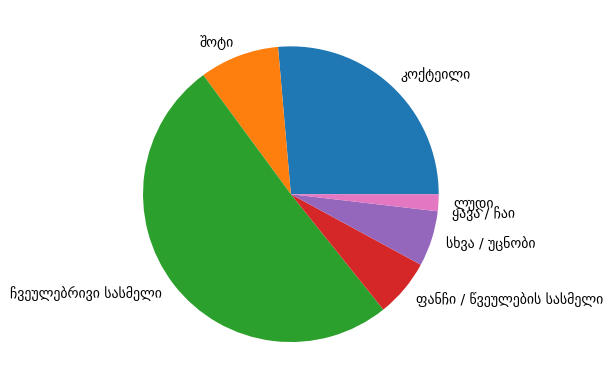

In [17]:
def beverage_counter(beverage):
    return cursor.execute('SELECT count(*) FROM cocktail_reciepes WHERE field5 = ?', (beverage,)).fetchone()[0]

cockteil = beverage_counter("Cocktail")
shot = beverage_counter("Shot")
ordinary_drink = beverage_counter("Ordinary Drink")
other = beverage_counter("Other / Unknown")
cofee_tea = beverage_counter("Cofee / Tea")
beer = beverage_counter("Beer")
punch = beverage_counter("Punch / Party Drink")


labels = 'კოქტეილი', 'შოტი', 'ჩვეულებრივი სასმელი', 'ფანჩი / წვეულების სასმელი', 'სხვა / უცნობი', 'ყავა / ჩაი', 'ლუდი'
sizes = [cockteil, shot, ordinary_drink, punch, other, cofee_tea, beer]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
plt.show()

Text(0, 0.5, 'სასმელების ჯამური რაოდენობა')

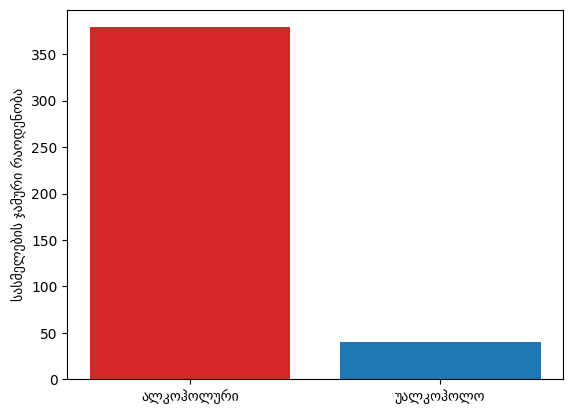

In [9]:
def alcohol_counter(alcohol):
    return cursor.execute('SELECT count(*) FROM cocktail_reciepes WHERE field4 = ?', (alcohol,)).fetchone()[0]

alcoholic = alcohol_counter("Alcoholic")
non_acloholic = alcohol_counter("Non alcoholic")

fig, ax = plt.subplots()

bevarage = ['ალკოჰოლური', 'უალკოჰოლო']
counts = [alcoholic, non_acloholic]
bar_labels = ['ალკოჰოლური', 'უალკოჰოლო']
bar_colors = ['tab:red', 'tab:blue']

ax.bar(bevarage, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('სასმელების ჯამური რაოდენობა')


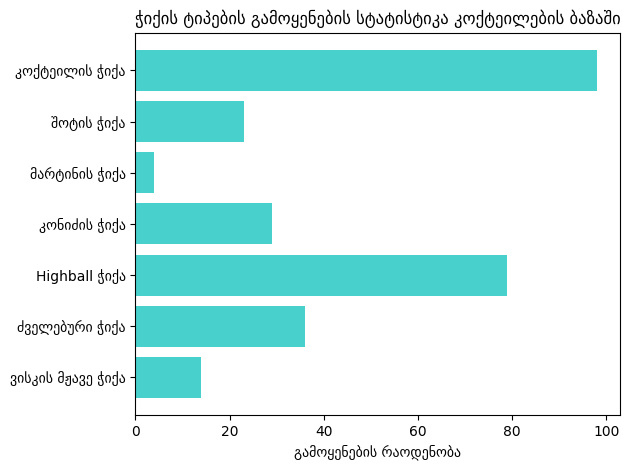

In [19]:
def glass_counter(glass):
    return cursor.execute('SELECT count(*) FROM cocktail_reciepes WHERE field6 = ?', (glass,)).fetchone()[0]

Cocktail_Glass = glass_counter('Cocktail glass')
Shot_Glass = glass_counter('Shot glass')
Martini_Glass = glass_counter("Martini Glass")
Collins_Glass = glass_counter("Collins glass")
Highball_Glass = glass_counter("Highball glass")
Old_Fashioned_Glass = glass_counter("Old-fashioned glass")
Whiskey_sour_Glass = glass_counter("Whiskey sour glass")


import numpy as np

glass_types = [
    "კოქტეილის ჭიქა",
    "შოტის ჭიქა",
    "მარტინის ჭიქა",
    "კონიძის ჭიქა",
    "Highball ჭიქა",
    "ძველებური ჭიქა",
    "ვისკის მჟავე ჭიქა"
]
counts = [
    Cocktail_Glass,
    Shot_Glass,
    Martini_Glass,
    Collins_Glass,
    Highball_Glass,
    Old_Fashioned_Glass,
    Whiskey_sour_Glass
]

y_pos = np.arange(len(glass_types))

fig, ax = plt.subplots()
ax.barh(y_pos, counts, align='center', color='mediumturquoise')
ax.set_yticks(y_pos, labels=glass_types)
ax.invert_yaxis()  # ყველაზე ხშირი იყოს ზემოდან
ax.set_xlabel('გამოყენების რაოდენობა')
ax.set_title('ჭიქის ტიპების გამოყენების სტატისტიკა კოქტეილების ბაზაში')

plt.tight_layout()
plt.show()